In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import danplotlib as dpl
import pandas as pd
import gc_colors as gc
from itertools import cycle

gc.update_colorcycle()

# Read Lightyields

In [2]:
LY_Unirrad = pd.read_csv("Lightyield/Results/Layer_0/5GeV_000mm_0degree_3V5_Ths152535_1.csv",
                        delim_whitespace=True, index_col=0)
LY_Irrad = pd.read_csv("Lightyield/Results/Layer_0/5GeV_000mm_0degree_3V5_moduleSwap_Ths152535_1.csv",
                      delim_whitespace=True, index_col=0)

In [3]:
LY_Unirrad.head(1)

Default_AtTrack_Mean  Default_AtTrack_Meanerr  Default_ClusterCenter_Mean  \
Ch                                                                              
0                  9.562                     0.09                       9.849   

    Default_ClusterCenter_Meanerr  Default_Clusterlightyield_Mean  \
Ch                                                                  
0                           0.078                            10.4   

    Default_Clusterlightyield_Meanerr  Default_InCluster_Mean  \
Ch                                                              
0                               0.083                   8.536   

    Default_InCluster_Meanerr  Default_SingleChCluster_Mean  \
Ch                                                            
0                       0.057                         9.337   

    Default_SingleChCluster_Meanerr  Default_SingleChClusterneartrack_Mean  \
Ch                                                                           
0                             0.084                                  9.409   

    Default_SingleChClusterneartrack_Meanerr  
Ch                                            
0                                      0.085

# Read Efficiencies

In [4]:
Eff_Unirrad = pd.read_csv("Efficiencies/Results/Layer_0/5GeV_000mm_0degree_3V5_Ths152535_1.csv",
                          delim_whitespace=True, index_col=0)
Eff_Irrad = pd.read_csv("Efficiencies/Results/Layer_0/5GeV_000mm_0degree_3V5_moduleSwap_Ths152535_1.csv",
                        delim_whitespace=True, index_col=0)

In [6]:
Eff_Irrad.head(1)

Default_BX1  Default_BX1_lowerr  Default_BX1_uperr  Default_BX2  \
Ch                                                                    
0       0.90331             0.01199            0.01085      0.21987   

    Default_BX2_lowerr  Default_BX2_uperr  Default_SPIROC  \
Ch                                                          
0              0.01534            0.01611         0.92115   

    Default_SPIROC_lowerr  Default_SPIROC_uperr  
Ch                                               
0                 0.01072                0.0096

# Plot Efficiency vs. Lightyield

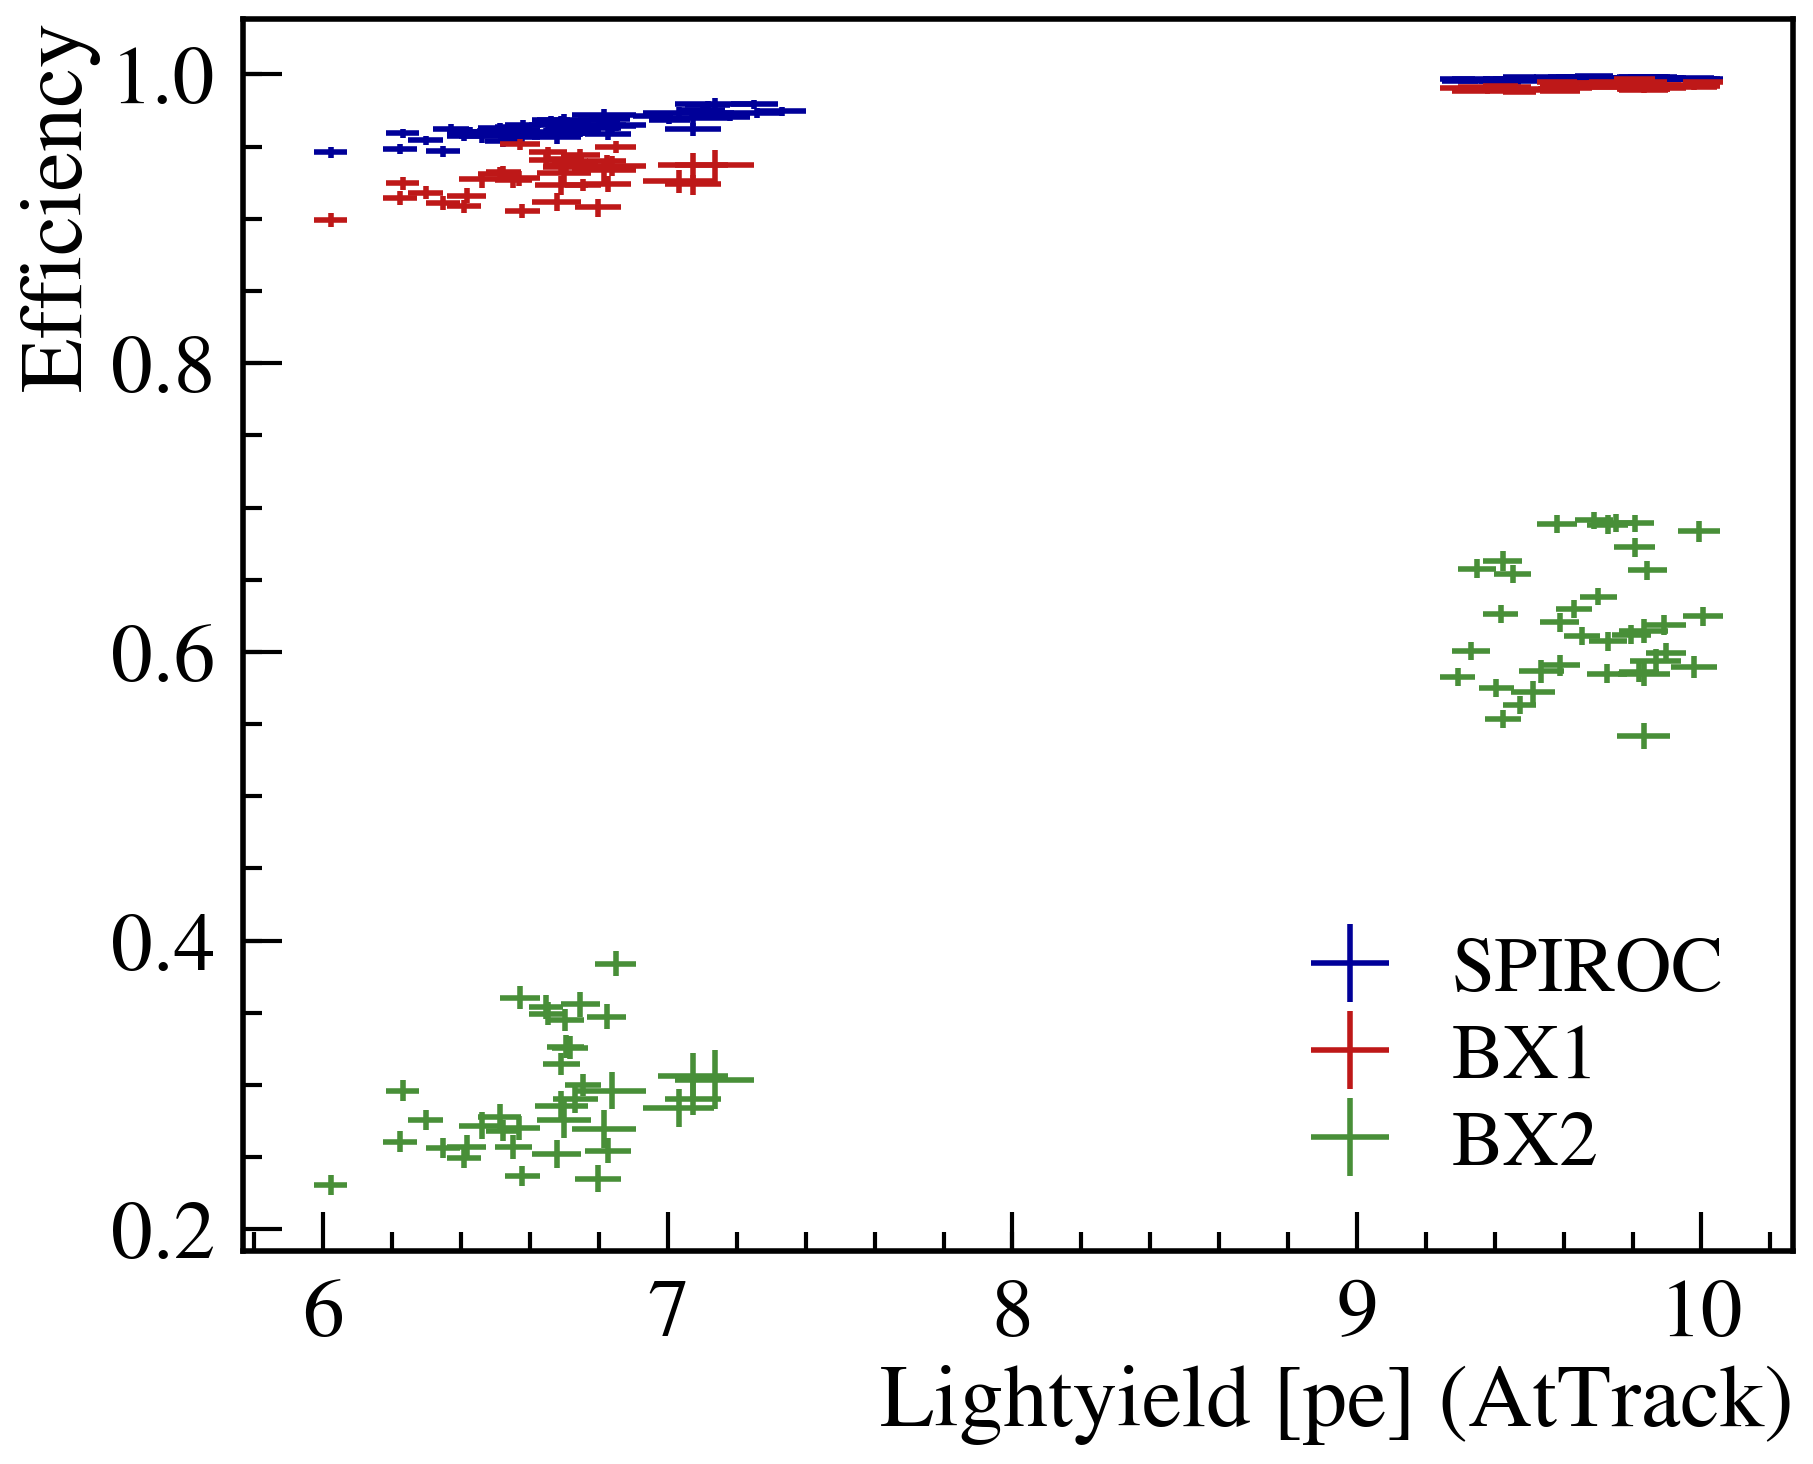

In [7]:
Algo = "Default"
LYtype = "AtTrack"
PACIFIC_chs = range(3,20) + range(29, 48)
SPIROC_chs = range(3, 60)

colors = cycle(["gcblue", "gcred", "gcgreen"])

for Meas in ["SPIROC", "BX1", "BX2"]:
    chs = PACIFIC_chs if "BX" in Meas else SPIROC_chs
    col = colors.next()
    for no, (LY, Eff) in enumerate(zip([LY_Unirrad, LY_Irrad], [Eff_Unirrad, Eff_Irrad])):
        LY_mean = LY["{}_{}_Mean".format(Algo, LYtype)]
        mask = [ch in chs for ch in LY_mean.index]
        LY_mean = LY_mean[mask]
        LY_err = LY_arr = LY["{}_{}_Meanerr".format(Algo, LYtype)][mask]
        Eff_mean = Eff["{}_{}".format(Algo, Meas)][mask]
        Eff_lowerr = Eff["{}_{}_lowerr".format(Algo, Meas)][mask]
        Eff_uperr = Eff["{}_{}_uperr".format(Algo, Meas)][mask]

        if no == 0:
            dpl.errorbar(LY_mean, Eff_mean, xerr=LY_err, yerr=[Eff_lowerr, Eff_uperr], fmt=".", 
                        color = col, label=Meas)
        else:
            dpl.errorbar(LY_mean, Eff_mean, xerr=LY_err, yerr=[Eff_lowerr, Eff_uperr], fmt=".", 
                        color = col, label="")

            
dpl.xlabel("Lightyield [pe] ({})".format(LYtype))
dpl.ylabel("Efficiency")
plt.legend()
plt.show()
plt.close()

# Plot efficiency ratio of BX1 and BX2 vs. Lightyield

In [ ]:
Algo = "Default"
LYtype = "AtTrack"
PACIFIC_chs = range(3,20) + range(29, 48)
SPIROC_chs = range(3, 60)

colors = cycle(["gcblue", "gcred", "gcorange"])

for Meas in ["SPIROC", "BX1", "BX2"]:
    chs = PACIFIC_chs if "BX" in Meas else SPIROC_chs
    col = colors.next()
    for no, (LY, Eff) in enumerate(zip([LY_Unirrad, LY_Irrad], [Eff_Unirrad, Eff_Irrad])):
        LY_mean = LY["{}_{}_Mean".format(Algo, LYtype)]
        mask = [ch in chs for ch in LY_mean.index]
        LY_mean = LY_mean[mask]
        LY_err = LY_arr = LY["{}_{}_Meanerr".format(Algo, LYtype)][mask]
        Eff_mean = Eff["{}_{}".format(Algo, Meas)][mask]
        Eff_lowerr = Eff["{}_{}_lowerr".format(Algo, Meas)][mask]
        Eff_uperr = Eff["{}_{}_uperr".format(Algo, Meas)][mask]

        if no == 0:
            dpl.errorbar(LY_mean, Eff_mean, xerr=LY_err, yerr=[Eff_lowerr, Eff_uperr], fmt=".", 
                        color = col, label=Meas)
        else:
            dpl.errorbar(LY_mean, Eff_mean, xerr=LY_err, yerr=[Eff_lowerr, Eff_uperr], fmt=".", 
                        color = col, label="")

            
dpl.xlabel("Lightyield [pe] ({})".format(LYtype))
dpl.ylabel("Efficiency")
plt.legend()
plt.show()
plt.close()ab